In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lfilter, savgol_filter

In [2]:
processed_data_path = "../../Data/Processed/Test2.csv"

In [3]:
df = pd.read_csv(processed_data_path)

In [4]:
df.head()

,Unnamed: 0,Temperature,Pressure,Altitude,SeaLevelPressure,SeaLevelAltitude
0,0,28.3,84610,1494.57,84615,1580.52
1,1,28.3,84611,1494.86,84612,1580.71
2,2,28.3,84611,1494.86,84617,1580.32
3,3,28.3,84614,1494.48,84613,1580.52
4,4,28.3,84614,1494.86,84608,1580.52


In [5]:
df.drop("Unnamed: 0", inplace=True, axis=1)
df.head()

,Temperature,Pressure,Altitude,SeaLevelPressure,SeaLevelAltitude
0,28.3,84610,1494.57,84615,1580.52
1,28.3,84611,1494.86,84612,1580.71
2,28.3,84611,1494.86,84617,1580.32
3,28.3,84614,1494.48,84613,1580.52
4,28.3,84614,1494.86,84608,1580.52


In [6]:
df.shape

(698, 5)

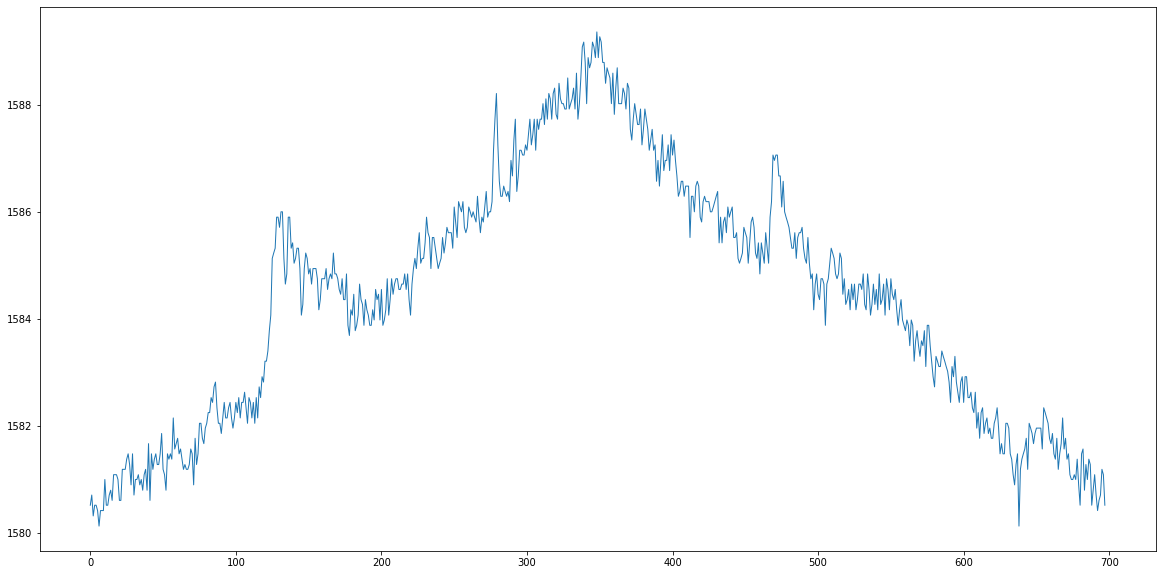

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['SeaLevelAltitude'], linewidth=1)
plt.show()

## Curve fitting
Curve fitting is a type of optimization that finds an optimal set of parameters for a defined function that best fits a given set of observations.

Unlike supervised learning, curve fitting requires that you define the function that maps examples of inputs to outputs.

The mapping function, also called the basis function can have any form you like, including a straight line (linear regression), a curved line (polynomial regression), and much more. This provides the flexibility and control to define the form of the curve, where an optimization process is used to find the specific optimal parameters of the function.

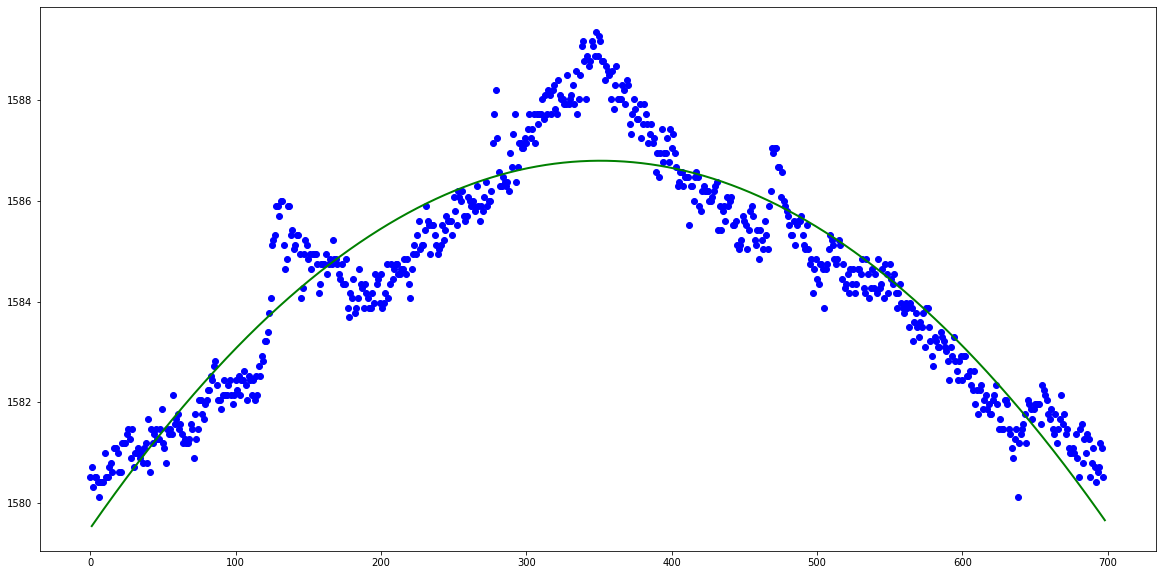

In [8]:
plt.figure(figsize=(20, 10))

# NumPy has a method that lets us make a polynomial model:
mymodel = np.poly1d(np.polyfit(df.index, df['SeaLevelAltitude'], 2))

# Then specify how the line will display, we start at position 1, and end at position 698
myline = np.linspace(1, 698, 698*3)

# Draw the original scatter plot:
plt.scatter(df.index, df['SeaLevelAltitude'], color="b")

# Draw the line of polynomial regression:
plt.plot(myline, mymodel(myline), linewidth=2, color="g")
plt.show()

## R squared
It is important to know how well the relationship between the values of the x- and y-axis is, if there are no relationship the polynomial regression can not be used to predict anything.

The relationship is measured with a value called the r-squared.

The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related.

In [9]:
from sklearn.metrics import r2_score

mymodel = np.poly1d(np.polyfit(df.index, df['SeaLevelAltitude'], 2))

print(r2_score(df['SeaLevelAltitude'], mymodel(df.index)))

0.869418791575142


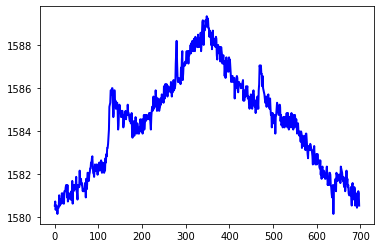

In [10]:

n = 1  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b, a, df['SeaLevelAltitude'])
plt.plot(df.index, yy, linewidth=2, linestyle="-", c="b")  # smooth by filter

In [11]:
print(r2_score(df['SeaLevelAltitude'], yy))

1.0


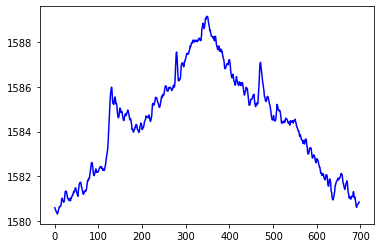

In [12]:
from scipy.signal import savgol_filter
w = savgol_filter(df['SeaLevelAltitude'], 9, 2)
plt.plot(df.index, w, 'b')  # high frequency noise removed

In [13]:
print(r2_score(df['SeaLevelAltitude'], w))

0.9904718029375587


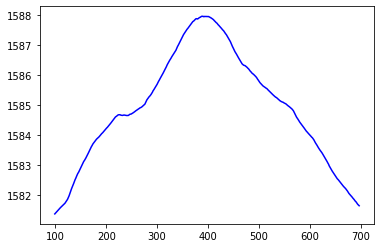

In [14]:
y = df['SeaLevelAltitude'].rolling(100).mean()
plt.plot(df.index, y, 'b')  # high frequency noise removed
plt.show()

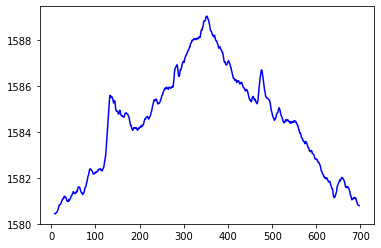

In [15]:
y = df['SeaLevelAltitude'].rolling(9, win_type='gaussian').mean(std=df.std().mean())
plt.plot(df.index, y, 'b')  # high frequency noise removed
plt.show()

<AxesSubplot:>

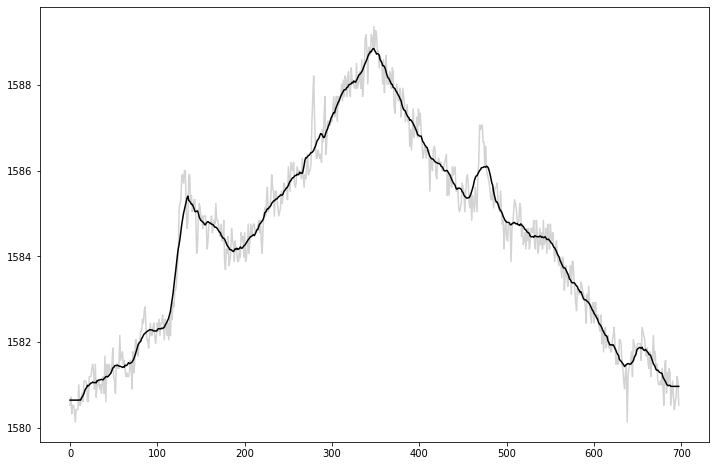

In [16]:
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsRegressor(n_neighbors=20, weights='uniform')

clf.fit(df.index.values[:, np.newaxis], df['SeaLevelAltitude'])

y_pred = clf.predict(df.index.values[:, np.newaxis])

ax = pd.Series(df['SeaLevelAltitude']).plot(color='lightgray')

pd.Series(y_pred).plot(color='black', ax=ax, figsize=(12, 8))

In [17]:
print(r2_score(df['SeaLevelAltitude'], y_pred))

0.9792990902548689
